In [23]:
import nltk
nltk.download('stopwords')
import pandas as pd
import nltk
import re
import textblob
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
from IPython.display import Image


dataset = pd.read_csv('economy.csv')

ModuleNotFoundError: No module named 'nltk'

In [15]:
# Remove punctuation
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words



In [16]:
# Remove stopwords from a list of words
def remstop(words):
    new_words = []
    for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word)
    return new_words

In [17]:
# Return a dictionary of counts of unique words from a list of words
def ret_dict(allwords):
    unique_words = set(allwords)
    dic = {}
    for i in unique_words:
        dic[i] = allwords.count(i)
    return dic

In [18]:
###################### PART 1 ###########################

# Initialize storage variables
sentences = [] # a list of all the original sentences
sentences_array = [] # a 2D list of pre-processed words of sentences, one sentence per array
vocabulary = [] # list of all unique words
wordcounts = {} # dictionary of counts of each unique word
scores = [] # scores of each sentence

# Split data into sentences
for i in range(len(dataset['tweet'])):
    review_sent = nltk.sent_tokenize(str(dataset['tweet'][i]))
    for j in review_sent:
        sentences.append(j)

In [19]:
# Tokenize sentences, remove stop words and punctuations
for i in sentences[0:]:
    words = [w.lower() for w in list(set(remove_punctuation(nltk.wordpunct_tokenize(i))))]
    sentences_array.append(words)
    vocabulary.extend(words)
    
# Calculate frequency/count of each word in the entire review set
wordcounts = ret_dict(remstop(vocabulary))
print("Vocabulary size :",len(wordcounts))
print("Number of sentences :",len(sentences))


# Calculate score of each sentence and append to a list
# Score is calculated after removing punctuations and stop words, and getting unique words
sent_count = []
for i,sentence in enumerate(sentences_array):
    sent_count.append([wordcounts[word] for word in list(set(remstop(sentence)))])
    scores.append((i,sum(sent_count[-1])))

# Sort scores in descending order and print top 5 original sentences
scores = sorted(scores, key = lambda x:x[1], reverse = True)

# Print the top 5 original sentences based on score
for j,i in enumerate(scores[0:5]):
    print("\n\nRank ", j+1, "...\n\nSentence number =", i[0]+1, "Score =",i[1])
    #print(sentences_array[i[0]])
    #print(sent_count[i[0]])
    print(sentences[i[0]])

Vocabulary size : 30091
Number of sentences : 44470


Rank  1 ...

Sentence number = 16698 Score = 67746
We don't need a perfect govt but we need a truthful govt @narendramodi 🙏
Time to focus on falling economy of India, time to share the truth with people of India and time to rethink where you have failed 
 https://www.google.com/amp/s/m.economictimes.com/news/economy/indicators/indias-gdp-growth-slips-to-5-8-per-cent-in-q4/amp_articleshow/69597967.cms …
 https://www.google.com/amp/s/m.economictimes.com/news/economy/indicators/view-indias-economy-is-in-crisis-after-reduced-gdp-estimate/amp_articleshow/69766125.cms …
 http://www.economicsdiscussion.net/articles/failures-of-economic-planning-in-india/2213 … https://twitter.com/TV9Bharatvarsh/status/1164432574330150912 …


Rank  2 ...

Sentence number = 38936 Score = 67746
We don't need a perfect govt but we need a truthful govt @narendramodi 🙏
Time to focus on falling economy of India, time to share the truth with people of India and ti

In [21]:
# Tag the word tokens
nltk.download('averaged_perceptron_tagger')
import nltk
from textblob import TextBlob

allreviews = " ".join([sentence for sentence in sentences])
#print(allreviews)

blob = TextBlob(allreviews)
#print(blob.tags)

# Print proper nouns based on the NNP tag
nouns = [word[0].lower() for word in blob.tags if word[1] in ['NNP','NN','NNS','NNPS']]
adj = [word[0].lower() for word in blob.tags if word[1] in ['JJ', 'JJR', 'JJS']]

mywords = [] # adjectives followed by nouns (bigrams)
allwords = blob.tags
for i in range(1,len(allwords)):
    if(allwords[i][1] in ['NNP','NN','NNS','NNPS'] and allwords[i-1][1] in ['JJ', 'JJR', 'JJS'] 
       and "tortilla" in allwords[i][0]):
        mywords.append(allwords[i-1][0].lower())

print(len(nouns))
print(len(adj))
print(len(mywords))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/aniketkr612/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


262002
57927
0


In [27]:

###################### PART 2 ###########################
# Building wordclouds

def build_wordcloud(name, wordset, width = 400, height = 400, stopwords = set(STOPWORDS), min_font_size = 0):
    wordcloud = WordCloud(width = width, height = height,
                      stopwords=stopwords,
                      background_color='white', min_font_size=min_font_size).generate(wordset)
    wordcloud.to_file(name+".png")
    
    

# nouns - list of all the nouns in the dataset
allnouns = " ".join(nouns)

# adj - list of all the adjectives in the dataset
alladj = " ".join(adj)

# adj_then_noun - bigrams containing adjective then noun (noun = tortilla)
adj_then_noun = " ".join(mywords)


# adj - list of all the adjectives in the dataset
noun_phrases = dataset['tweet'].apply(lambda i : TextBlob(str(i)).noun_phrases)
allnounphrases = ""

# Get all the noun phrases and club them to one string (done by textblob)
for i in range(len(noun_phrases)):
    if(noun_phrases[i]):
        allnounphrases = allnounphrases + " ".join(noun_phrases[i])
print(len(allnounphrases))

wordclouds = [allnouns, alladj, allnounphrases]

names = ["nouns", "adjectives", "noun_phrases"]

# Building wordclouds out of all the nouns, adjectives and noun-phrases (adjective + noun)
for cloud in range(len(wordclouds)):
    build_wordcloud(names[cloud], wordclouds[cloud])
    

# ################## Meaningful combos of adjective-noun where noun = "tortilla" ####################################3
# # Wordclouds of adjectives to the noun "tortilla" 
# build_wordcloud("tortilla", adj_then_noun, width = 400, height = 400, min_font_size=0)



1987811


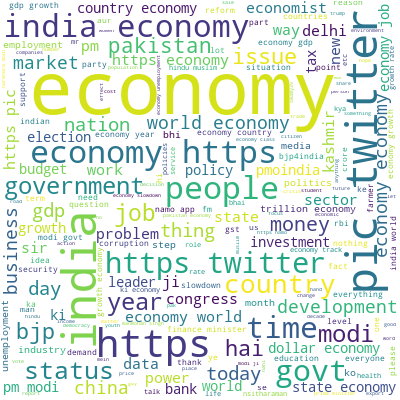

In [28]:
Image('nouns.png')